The `Boxplots`class offers a simple interface for creating boxplots to compare different models, observational datasets, and variables

In [2]:
from aqua.diagnostics import Boxplots, PlotBoxplots

As an example, we will plot the net long-wave and top net short-wave radiation fluxes at the top of the atmosphere for the IFS-NEMO historical experiment, comparing the results with ERA5 and CERES climatologies.
We start by retrieving the data and computing the fieldmeans of the required variables.

In [ ]:
variables  = ['-tnlwrf', 'tnswrf']

boxplots = Boxplots(model = 'IFS-NEMO', exp ='historical-1990', source = 'lra-r100-monthly')
boxplots.run(var=variables)

boxplots_era5 = Boxplots(model = 'ERA5', exp ='era5', source = 'monthly')
boxplots_era5.run(var=variables)

boxplots_ceres = Boxplots(model = 'CERES', exp ='ebaf-toa41', source = 'monthly',  regrid='r100')
boxplots_ceres.run(var=variables)



2025-07-09 16:04:44 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-07-09 16:04:44 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data


The field means of the retrieved variables are stored as attributes of the `Boxplots` class. They can be optionally saved as NetCDF files by setting the `save_netcdf=True` flag during the class initialization.



In [ ]:
boxplots.fldmeans

<xarray.Dataset> Size: 4kB
Dimensions:  (time: 146)
Coordinates:
  * time     (time) datetime64[ns] 1kB 1990-01-01 1990-02-01 ... 2002-02-01
Data variables:
    tnlwrf   (time) float64 1kB dask.array<chunksize=(12,), meta=np.ndarray>
    tnswrf   (time) float64 1kB dask.array<chunksize=(12,), meta=np.ndarray>
Attributes:
    catalog:    climatedt-phase1
    model:      IFS-NEMO
    exp:        historical-1990
    startdate:  1990-01-01T00:00:00.000000000
    enddate:    2002-02-01T00:00:00.000000000

Let's now produce the boxplot throught `plot_boxplots` method of the class `PlotBoxplots`. 
The method requires in input the list of dataset(s) and reference dataset(s) containing the fldmeans of the variables to plot.


2025-06-26 18:02:23 :: Boxplots :: DEBUG    -> Updating the log_level to DEBUG
/LUMI_TYKKY_A4O6710/miniconda/envs/env1/lib/python3.12/site-packages/sparse/_coo/core.py:216: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(
/LUMI_TYKKY_A4O6710/miniconda/envs/env1/lib/python3.12/site-packages/sparse/_coo/core.py:216: DeprecationWarning: coords should be an ndarray. This will raise a ValueError in the future.
  warnings.warn(
2025-06-26 18:03:21 :: Boxplots :: INFO     -> catalogs: ['climatedt-phase1'], models: ['IFS-NEMO'], experiments: ['historical-1990']
2025-06-26 18:03:21 :: Boxplots :: INFO     -> ref catalogs: ['obs', 'obs'], models: ['CERES', 'ERA5'], experiments: ['ebaf-toa41', 'era5']
2025-06-26 18:03:21 :: OutputSaver :: DEBUG    -> Generated filename: radiation.boxplot.climatedt-phase1.IFS-NEMO.historical-1990.multiref.-tnlwrf_tnswrf
2025-06-26 18:03:21 :: create_folder :: INFO     -> Folder ./png already exists
2025-

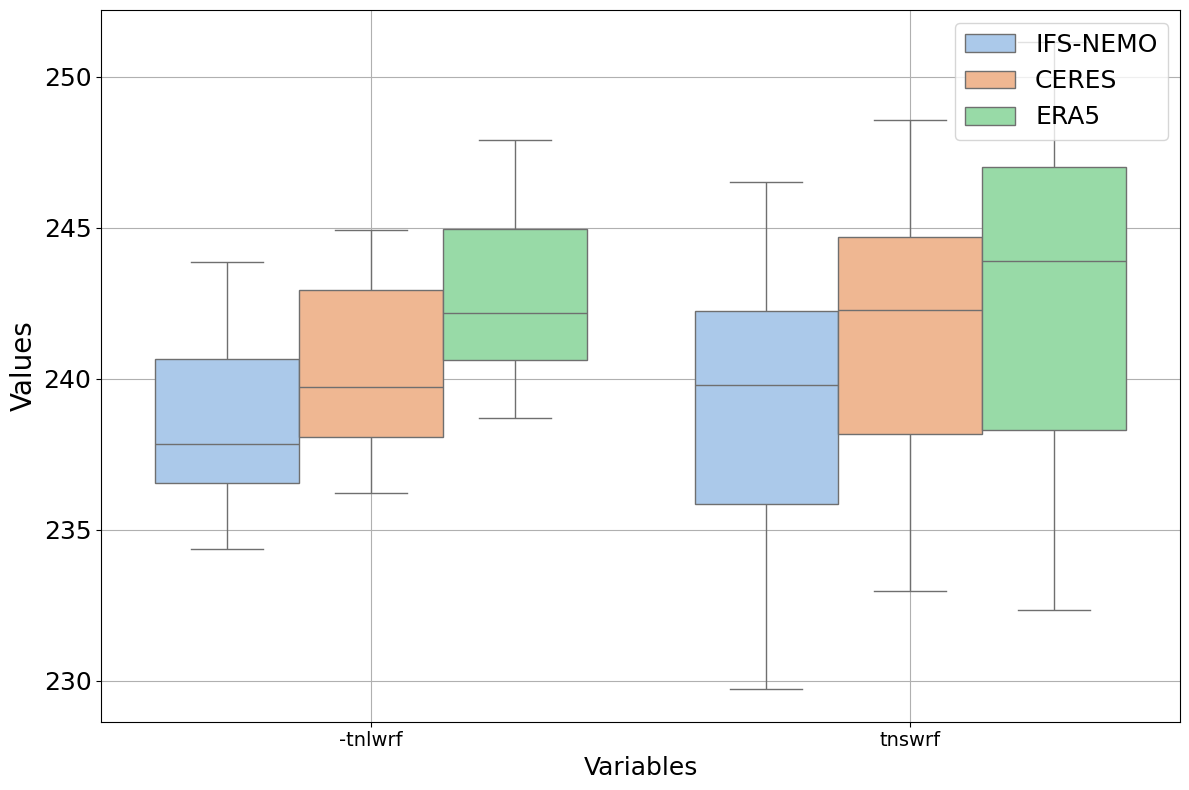

In [4]:
datasets = [boxplots.fldmeans]
datasets_ref = [boxplots_ceres.fldmeans, boxplots_era5.fldmeans]

plot = PlotBoxplots(diagnostic='radiation', save_png=True, save_pdf=False, loglevel='DEBUG')
plot.plot_boxplots(data=datasets, data_ref=datasets_ref, var=variables)